In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold

In [3]:
train = pd.read_csv('train_sant.csv')

In [4]:
test= pd.read_csv('test_sant.csv')

In [5]:
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [6]:
train.drop('ID', axis=1, inplace=True)

In [7]:
from sklearn.utils import class_weight
cw = list(class_weight.compute_class_weight('balanced',
                                             np.unique(train['TARGET']),
                                             train['TARGET']))

c:\users\despik\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass classes=[0 1], y=0        0
1        0
2        0
3        0
4        0
        ..
76015    0
76016    0
76017    0
76018    0
76019    0
Name: TARGET, Length: 76020, dtype: int64 as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [8]:
cw

[0.5205993535309265, 12.636303191489361]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('TARGET', axis=1), 
                                                    train['TARGET'], 
                                                    test_size=0.3,
                                                    stratify=train['TARGET'],
                                                    random_state=42)

In [10]:
constant_features = [
    features for features in train.columns if train[features].std() == 0
]
len(constant_features)

34

In [11]:
train.drop(labels = constant_features, axis = 1, inplace=True)
#X_test.drop(labels = constant_features, axis = 1, inplace = True)

In [12]:
test.drop(labels = constant_features, axis = 1, inplace = True)

In [13]:
quasi_constant_feat = []
for feature in train.columns:
    predominant = (train[feature].value_counts() / np.float(
        len(train))).sort_values(ascending=False).values[0]
    if predominant > 0.99:
        quasi_constant_feat.append(feature)
len(quasi_constant_feat)

187

In [14]:
train.drop(labels = quasi_constant_feat, axis = 1, inplace=True)
#X_test.drop(labels = quasi_constant_feat, axis = 1, inplace = True)

In [15]:
test.drop(labels = quasi_constant_feat, axis = 1, inplace = True)

In [16]:
train.shape

(76020, 149)

In [17]:
X_test.shape

(22806, 369)

In [18]:
from tqdm.notebook import trange, tqdm

In [17]:
#duplicated_feat = []
#for i in trange(1000):
#    for i in range(0, len(X_test.columns)):
#        col_1 = X_test.columns[i]
#        for col_2 in X_test.columns[i + 1:]:
#            if X_test[col_1].equals(X_test[col_2]):
#                duplicated_feat.append(col_2)
#duplicated_features = set(duplicated_feat)
#print(len(duplicated_features))

In [19]:
duplicated_features = ['ind_var25',
 'ind_var26',
 'ind_var37',
 'num_var25',
 'num_var26',
 'num_var37',]

In [174]:
train.drop(labels = duplicated_features, axis = 1, inplace=True)
#X_test.drop(labels = duplicated_features, axis = 1, inplace = True)

In [175]:
test.drop(labels = duplicated_features, axis = 1, inplace = True)

In [177]:
pd.set_option('max_columns', 150)
corr = train.corr()

In [178]:
for col in corr.columns:
    print(col, np.abs(corr[col]).sum(axis=0))

var3 2.278584816178606
var15 20.693979258083743
imp_ent_var16_ult1 5.149461685172512
imp_op_var39_comer_ult1 28.45194467580817
imp_op_var39_comer_ult3 28.683736818746517
imp_op_var41_comer_ult1 28.104829766561856
imp_op_var41_comer_ult3 28.604220750059056
imp_op_var41_efect_ult1 20.548944453991123
imp_op_var41_efect_ult3 19.27870075681388
imp_op_var41_ult1 28.674868069686326
imp_op_var39_efect_ult1 20.579288589543857
imp_op_var39_efect_ult3 19.3546818881837
imp_op_var39_ult1 28.973693175970006
ind_var1_0 18.37261544561081
ind_var5_0 24.120773133665555
ind_var5 15.837446089732946
ind_var8_0 25.954811624222806
ind_var8 27.35898124514339
ind_var12_0 25.60280294283396
ind_var12 22.45598523139043
ind_var13_0 23.48666425160436
ind_var13_corto_0 22.27998829843688
ind_var13_corto 21.888565771826393
ind_var13_largo_0 8.595711977739146
ind_var13 23.14640639033239
ind_var14_0 16.84917703340013
ind_var24_0 20.860609560979803
ind_var24 21.004613605390418
ind_var25_cte 27.32031628275552
ind_var26_0 

In [24]:
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import SelectKBest, SelectPercentile

In [179]:
univariate = f_classif(train.drop('TARGET', axis=1), train['TARGET'])

In [180]:
univariate = pd.Series(univariate[1])
univariate.index = train.drop('TARGET', axis=1).columns
univariate.sort_values(ascending=False, inplace=True)

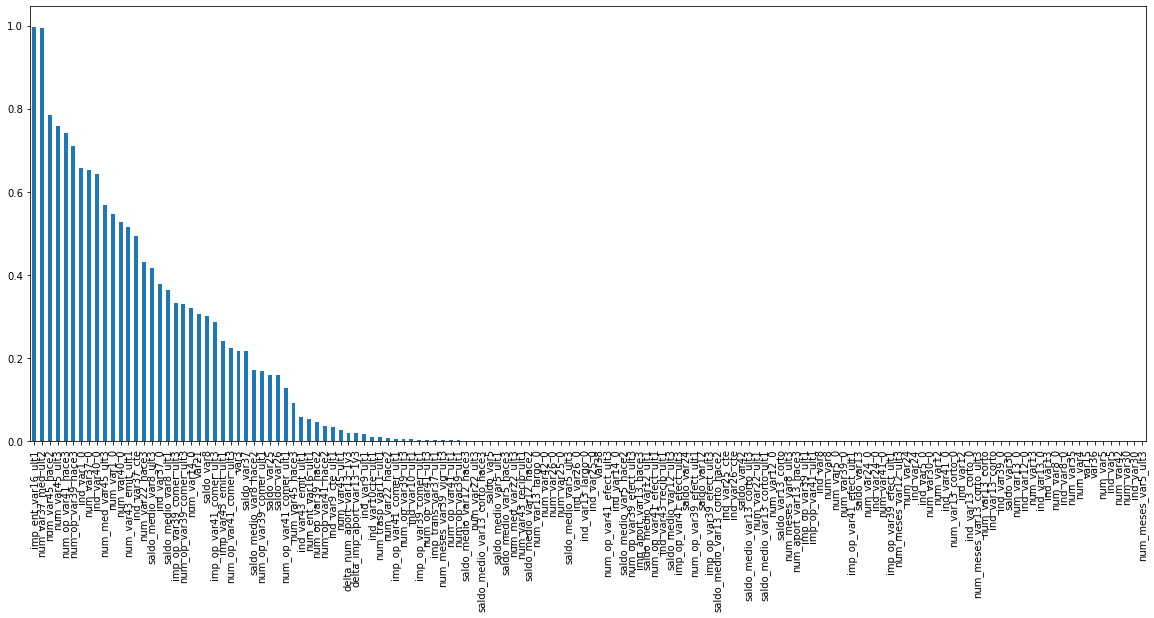

In [181]:
univariate.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [183]:
sel_ = SelectKBest(f_classif, k=35).fit(train.drop('TARGET', axis=1), train['TARGET'])
need_columns = train.drop('TARGET', axis=1).columns[sel_.get_support()]

In [184]:
need_columns

Index(['var15', 'imp_op_var39_efect_ult1', 'ind_var5_0', 'ind_var5',
       'ind_var8_0', 'ind_var12_0', 'ind_var12', 'ind_var13_0',
       'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13', 'ind_var24_0',
       'ind_var24', 'ind_var30', 'ind_var39_0', 'ind_var41_0', 'num_var4',
       'num_var5', 'num_var8_0', 'num_var12', 'num_var13_0',
       'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var24',
       'num_var30_0', 'num_var30', 'num_var35', 'num_var41_0', 'num_var42',
       'saldo_var30', 'var36', 'num_meses_var5_ult3', 'num_meses_var12_ult3',
       'num_meses_var13_corto_ult3'],
      dtype='object')

In [185]:
need_columns = ['var15', 'imp_op_var39_efect_ult1', 'ind_var5_0', 'ind_var5',
       'ind_var8_0', 'ind_var12_0', 'ind_var12', 'ind_var13_0',
       'ind_var13_corto_0', 'ind_var13_corto', 'ind_var13', 'ind_var24_0',
       'ind_var24', 'ind_var30', 'ind_var39_0', 'ind_var41_0', 'num_var4',
       'num_var5', 'num_var8_0', 'num_var12', 'num_var13_0',
       'num_var13_corto_0', 'num_var13_corto', 'num_var13', 'num_var24',
       'num_var30_0', 'num_var30', 'num_var35', 'num_var41_0', 'num_var42',
       'saldo_var30', 'var36', 'num_meses_var5_ult3', 'num_meses_var12_ult3',
       'num_meses_var13_corto_ult3']

In [128]:
from catboost import CatBoostClassifier
import optuna
from optuna.samplers import RandomSampler
from optuna.integration import OptunaSearchCV
from optuna.distributions import IntUniformDistribution, UniformDistribution

In [129]:
!pip install imblearn

In [188]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train = train[need_columns]
y_train = train['TARGET']
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

In [189]:
X_resampled.shape

(6016, 35)

In [192]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,
                                                        y_resampled, 
                                                        shuffle=True,
                                                        random_state=42,
                                                        test_size=0.2,
                                                        stratify=y_resampled
    )

In [194]:
cb_model = CatBoostClassifier(iterations=1000,
                              learning_rate=0.01,
                              depth = 4,
                              subsample = 0.75,
                              border_count =128,
                              l2_leaf_reg = 3,
                              eval_metric='AUC',
                              verbose=10,
                              random_seed = 42
                             )

In [195]:
cb_model.fit(
   X_train[need_columns], y_train,
   eval_set=(X_test[need_columns], y_test)
)

0:	test: 0.8012550	best: 0.8012550 (0)	total: 3.34ms	remaining: 3.34s
10:	test: 0.8306614	best: 0.8310932 (6)	total: 52.1ms	remaining: 4.68s
20:	test: 0.8293120	best: 0.8326136 (14)	total: 91.7ms	remaining: 4.28s
30:	test: 0.8283256	best: 0.8326136 (14)	total: 129ms	remaining: 4.04s
40:	test: 0.8337104	best: 0.8342320 (38)	total: 159ms	remaining: 3.73s
50:	test: 0.8354281	best: 0.8354281 (50)	total: 188ms	remaining: 3.5s
60:	test: 0.8348625	best: 0.8359428 (56)	total: 215ms	remaining: 3.3s
70:	test: 0.8361359	best: 0.8361359 (70)	total: 261ms	remaining: 3.41s
80:	test: 0.8362973	best: 0.8362973 (80)	total: 301ms	remaining: 3.42s
90:	test: 0.8362697	best: 0.8364187 (87)	total: 337ms	remaining: 3.36s
100:	test: 0.8372038	best: 0.8372341 (99)	total: 372ms	remaining: 3.31s
110:	test: 0.8370851	best: 0.8372341 (99)	total: 410ms	remaining: 3.29s
120:	test: 0.8378260	best: 0.8378260 (120)	total: 446ms	remaining: 3.24s
130:	test: 0.8380854	best: 0.8382040 (125)	total: 483ms	remaining: 3.2s
140

In [60]:
catboost = CatBoostClassifier(n_estimators=200,
                              logging_level='Silent',
                              random_state=42)


In [78]:
catboost_param_grid = {
    'learning_rate': [0.1, 0.05, 0.01]
}

In [62]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [79]:
strat = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

simple_search = GridSearchCV(catboost, 
                             catboost_param_grid, 
                             cv=strat,
                             n_jobs=-1,
                             scoring='roc_auc',
                             return_train_score=False)

In [72]:
from sklearn.metrics import roc_auc_score

In [80]:
%%time

simple_search.fit(X_train, y_train)

print("Наилучшие значения гиперпараметров: {}".format(
    simple_search.best_params_))

print("Наилучшее значение AUC: {:.3f}".format(
    np.abs(simple_search.best_score_)))

print("AUC на тестовой выборке: {:.3f}".format(
    roc_auc_score(y_test, simple_search.predict_proba(X_test)[:, 1])))

Наилучшие значения гиперпараметров: {'learning_rate': 0.1}
Наилучшее значение AUC: 0.834
AUC на тестовой выборке: 0.843
Wall time: 1min 37s


In [81]:
ctbst = CatBoostClassifier(n_estimators=200,
                           learning_rate=0.1,
                           logging_level='Silent',
                           random_state=42,)


In [88]:
param_distributions = {'max_depth': IntUniformDistribution(3, 7),
                       'l2_leaf_reg': UniformDistribution(3.0, 40.0),
                       'random_strength': UniformDistribution(0.0, 5.0),
                       'border_count': IntUniformDistribution(64, 254),
                       'bagging_temperature': UniformDistribution(0.0, 5.0)}

optuna_search = OptunaSearchCV(
    ctbst,
    param_distributions,
    scoring='roc_auc',
    random_state=42,
    n_trials=10,
    verbose=1,
    cv=5)

<ipython-input-88-9a7628dc1238>:8: ExperimentalWarning: OptunaSearchCV is experimental (supported from v0.17.0). The interface can change in the future.
  optuna_search = OptunaSearchCV(


In [89]:
%%time
for i in trange(1000):
    optuna_search.fit(X_train, y_train)

print("Наилучшие значения гиперпараметров: {}".format(
    optuna_search.best_params_))
print("Наилучшее значение auc: {:.3f}".format(
    np.abs(optuna_search.best_score_)))
print("auc на тестовой выборке: {:.3f}".format(
    roc_auc_score(y_test, optuna_search.predict_proba(X_test)[:, 1])))
print("")

c:\users\despik\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\validation.py:68: FutureWarning: Pass classifier=True as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "
[I 2020-08-06 01:52:56,900] Searching the best hyperparameters using 53214 samples...
[I 2020-08-06 01:53:26,668] Trial 0 finished with value: 0.8350750605134175 and parameters: {'max_depth': 6, 'l2_leaf_reg': 8.489391593690103, 'random_strength': 3.1866823907588175, 'border_count': 194, 'bagging_temperature': 1.5972362551988368}. Best is trial 0 with value: 0.8350750605134175.
[I 2020-08-06 01:54:04,403] Trial 1 finished with value: 0.8348652411152127 and parameters: {'max_depth': 7, 'l2_leaf_reg': 28.749460406867268, 'random_strength': 2.557006933257962, 'border_count': 184, 'bagging_temperature': 0.8337341898490402}. Best is trial 0 with value: 0.8350750605134175.
[I 2020-08-06 01:54:27,3

KeyboardInterrupt: 

In [69]:
import sklearn

In [70]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [97]:
test[need_columns].head()

,var15,imp_op_var41_efect_ult1,imp_op_var39_efect_ult1,ind_var5_0,ind_var5,ind_var8_0,ind_var8,ind_var12_0,ind_var12,ind_var13_0,ind_var13_corto_0,ind_var13_corto,ind_var13,ind_var24,ind_var30,ind_var39_0,ind_var41_0,num_var4,num_var5_0,num_var5,num_var8_0,num_var8,num_var12,num_var13_0,num_var13_corto_0,num_var13_corto,num_var13,num_var24,num_var30,num_var35,num_var42,saldo_var30,var36,num_meses_var5_ult3,num_meses_var13_corto_ult3
0,32,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,0,0,0,0,0,0,0,0,3,3,3,6.0,3,3,0
1,35,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,1,3,3,0,0,0,0,0,0,0,0,3,3,3,3.0,3,3,0
2,23,60.0,60.0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,2,3,3,0,0,0,0,0,0,0,0,3,6,3,30.0,3,3,0
3,24,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0.0,99,0,0
4,23,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,1,1,1,1,3,3,0,0,0,0,0,0,0,0,3,3,3,30.0,3,3,0


In [196]:
submission_predictions = cb_model.predict(test[need_columns])

In [197]:
submission_predictions.shape

(75818,)

In [56]:
test.shape

(75818, 147)

In [198]:
submission = pd.DataFrame({
        "ID": test['ID'],
        "TARGET": submission_predictions
    })

submission.to_csv("submission_santander_3.csv", index=False)
print(submission.shape)

(75818, 2)
